# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: The outcome of this study will help us better understand how much a student's scores and ranking amongst their classmates will affect their chance of admittance into a program. We predict that GPA, GRE score, and class ranking will influence the likelihood of admittance into UCLA's graduate program for an individual student as compared to classmates in similar categories. Exploratory analysis will allow us to effectively determine the likelihood that certain things like GPA, GRE score, and class ranking affect the rate of admittance and establish that certain groups of individuals are part of a special distribution.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: The data is a set of scores on GPA, GRE scaore, and prestige rankings for undergraduate university programs. Data was loaded and processed with descriptive statistics initially to get a sense of the averages and trends that might be present. Data was then cleaned by dropping non-existent values and then a set of dummy variables was appended to the matrix for the model. Graphs were produced at diffferent points along with correlation coefficients to get a different perspective on expected trends.

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [50]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [51]:
frequency_table = pd.crosstab(df['admit'], df['prestige'], dropna=True)
print frequency_table

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


In [52]:
df.describe(percentiles=np.arange(.1, 1.0, 0.1))

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
10%,0.000000,440.000000,2.900000,1.000000
20%,0.000000,500.000000,3.050000,2.000000
30.0%,0.000000,520.000000,3.170000,2.000000
40%,0.000000,560.000000,3.310000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
60%,0.000000,620.000000,3.500000,3.000000


In [53]:
df = pd.get_dummies(df, columns=['prestige'])

In [54]:
del df['prestige_1.0']
df['intercept'] = 1.0
train_cols = df.columns[1:]
logit = sm.Logit(df['admit'], df[train_cols])
result = logit.fit()
print result.summary()
print np.exp(result.params)

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Fri, 31 Mar 2017   Pseudo R-squ.:                 0.08166
Time:                        21:55:26   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793

# Admission Status Odds (Demo Table)

In [55]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
odds_admit = np.exp(conf)
odds_admit

,2.5%,97.5%,OR
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2.0,0.272168,0.942767,0.506548
prestige_3.0,0.133377,0.515419,0.262192
prestige_4.0,0.093329,0.479411,0.211525
intercept,0.002207,0.194440,0.020716


### Methods: Write up the methods used in your analysis

Answer: The methods used in this analysis were general descriptive statistics and correlation via the Pandas module and the Statsmodels logistic regression module. The general methods was to clean teh data and describe its trends and then manipulate the data for the logistic regression, after which an odds ratio was also calculated by hand.

### Results: Write up your results

Answer: It appears that the odds of being admitted into the graduate school of a high-ranking university are very likely, representing a 2.18 chance, based on the GPA of an individual. Following this finding, the odds are still likely, representing a 1.00 chance, based on the GRE score of an individual. Prestige scores were significantly smaller, 0.50 or below, suggesting that the prestige score ranking does not contribute to the likelihood of admittance into graduate school.

### Visuals: Provide a table or visualization of these results

In [58]:
params

gre             0.002218
gpa             0.779337
prestige_2.0   -0.680137
prestige_3.0   -1.338677
prestige_4.0   -1.553411
intercept      -3.876854
dtype: float64

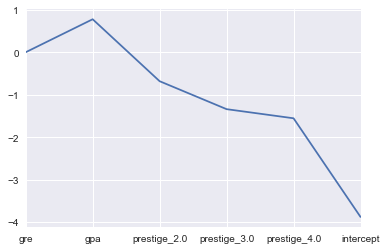

In [65]:
params.plot()

### Discussion: Write up your discussion and future steps

Answer: As discussed above, the best predictor of admission into a graduate level university is an individual's GPA score, followed by the score of said individual's GRE test. Prestige level rankings of their undergraduate institution do not seem to contribute or predict admission into a graduate level program. Further steps would be to investigate whether or not there is an interaction between GRE and GPA scores to see if their combined power contributes to admission rates and establish whether or not the two variables are mutually exclusive. Due to the results shown with prestige rankings, no further investigation with those data is suggested.